# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Refer to the Github repository for more [info](https://github.com/srpatel2000/Power-Outage-EDA). 

The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks) from Purdue University's website.

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

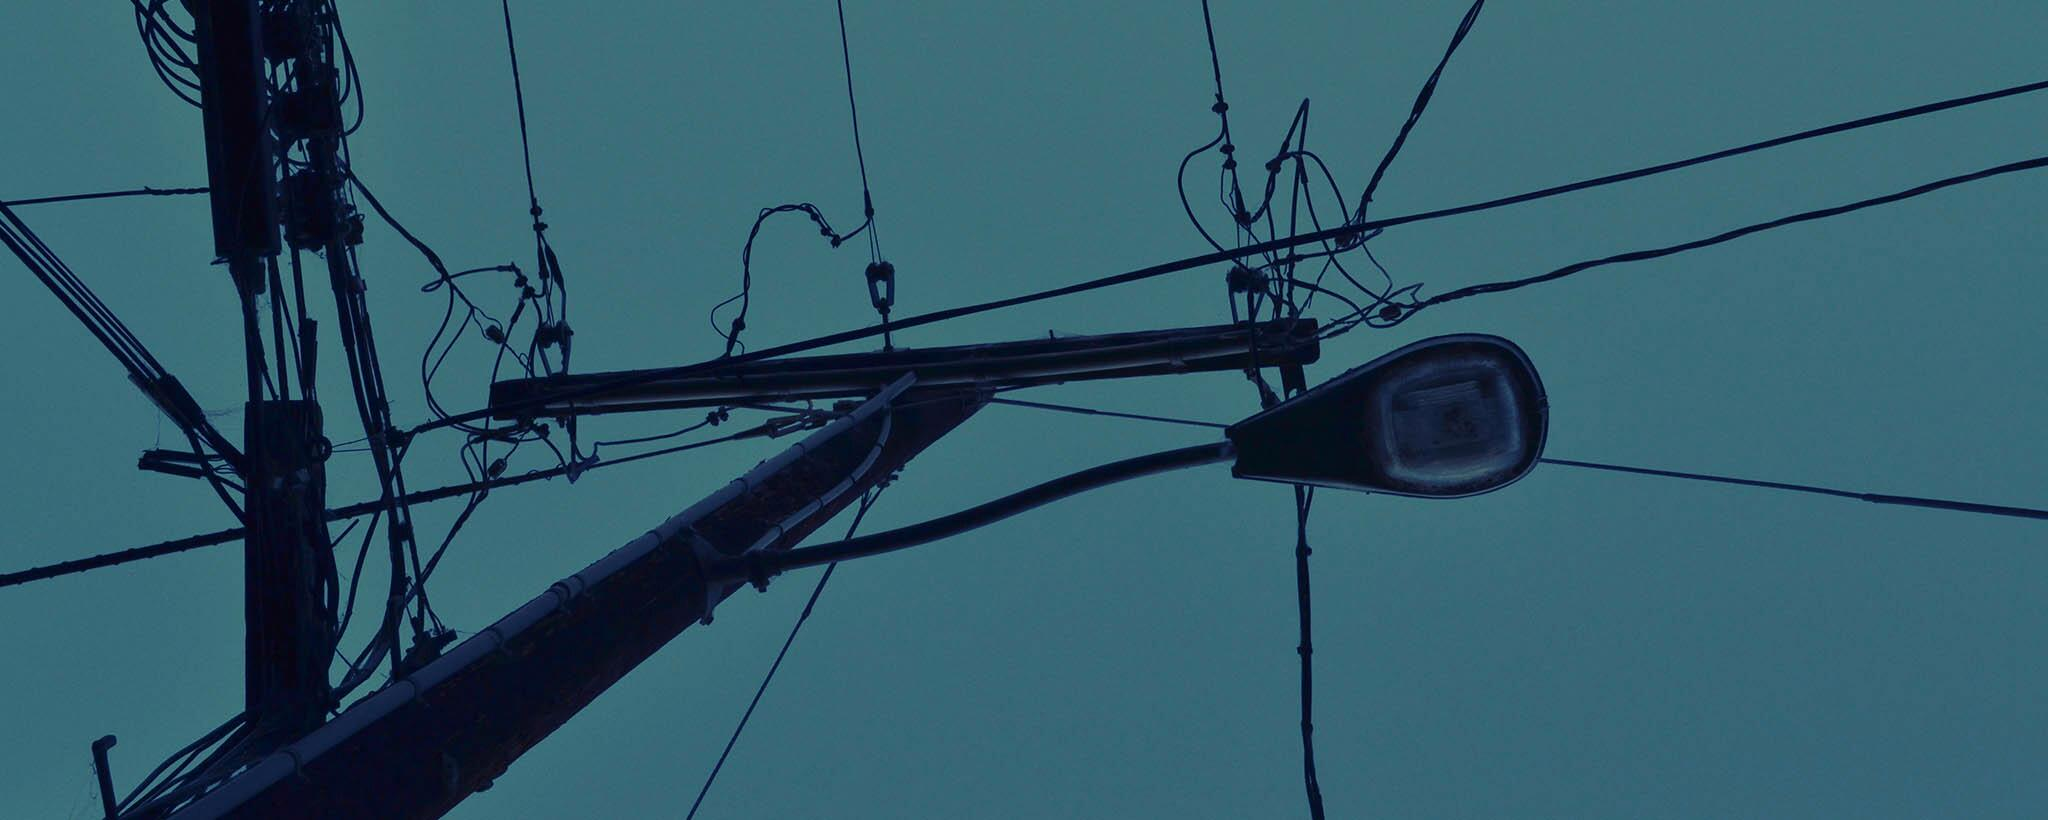

# Summary of Findings

### Project Goals
*First half of project*
1. Assess the quality of these datasets via exploratory data analysis
2. Assess the mechanism of missingness for some relevant portion of the dataset
3. Ask/answer a question about the dataset using a hypothesis test

*Second half of project*
4. Clearly state and frame a prediction problem (classification or regression); choose and justify an objective (e.g. accuracy vs f1-score)
5. Train a "baseline" model with generic set of features created for different kinds of data (e.g. ordinal encoding, one-hot encoding).
6. Engineer at least two new features from the data that improve the baseline model
7. Create an sklearn ML-pipeline; do a search for the best model and parameters using the pipeline.
8. Do an inference analysis on the results (i.e. does my model perform better on attribute X vs Y?)

### Cleaning and EDA
First, we had to clean our given dataset. When we first imported the set, the columns were not the correct names and the rows did not correctly represent the data generating process (DGP). In order to fix this, we obtained the relevant header names (which were located on row four), and made the column names equal to them. We also dropped the irrelevant 'variables' column that originally showed up because it did not matter in our analysis. Lastly, we set the observations equal to the index in order to more quickly find data. 

After reformatting the table to more correctly reflect the DGP, we combined the start date and time in order to create a summarized datetime column. We did the same for the end date and time in order to be uniform. We added these two columns to the dataframe in order to encompass a more precise dataset.

We also reformatted the dtypes of the columns that did not contain null values. This was in order to ensure that the DGP was accurate and so that future analysis would run smoother.

We then began our exploratory data analysis (EDA). In the EDA we focused on the above questions by creating graphs. More specifically, we performed univariate, bivariate, and aggregation analysis.

When performing univariate analysis, we mainly focused on finding where and when major power outages occur. We found that the main cause of power outages between 2000 and 2016 is severe weather followed by intentional attacks. We also found that most outages occur in states with higher populations. This may be due to the fact that states with a higher population tend to have more power plants, and therefore would be prone to having more outages. Going off of this fact, we found that the region that takes the most impact is the northeast region of the U.S. This would be fitting considering that many of these states (e.g. New York) have a high population density.

After visualizing this data, we knew we wanted to bring in the causes of the outages into our analysis. In our bivariate analysis we focused on how different outage causes affected rural versus urban populations. We created a spaghetti plot to see how the counts of different causes fluctuated by year. We noticed that severe weather was the main cause of outages up until 2011. Not only were there 269 overall outages this year, but intentional attacks took over as the biggest cause of outages. Upon doing research we can attribute the large amount of power outages to the 2011 Southwest Blackout Event. The outage was the result of 23 distinct events that occurred on 5 separate power grids in a span of 11 minutes. More information can be found here: https://www.nerc.com/pa/rrm/ea/Pages/September-2011-Southwest-Blackout-Event.aspx. This led us to wonder: how differently are urban versus rural areas affected by outages caused by intential attacks? We plotted a boxplot that conveyed how differently urban versus rural areas were affected by different causes. Although we found that intential attacks affected them at the same rate, severe weather did not.
So this led us to our hypothesis testing question: Are rural areas more prone to severe weather outages than urban areas? More information is in the Hypothesis Test Question of this summary. 

We also did some aggregation analysis be checking how many overall customers were affected by a specific cause. We did this in order to try to see why certain causes may affect rural areas more often. 

We split up the graphs that relate to our newly found hypothesis test and other fun visualizations we did while investigating our questions. We won't go into much detail about the findings in those, however we plan on utilizing those graphs for further analysis in the future so you can go ahead and take a look at them yourself. 

## First half of project (Hypothesis Testing)

### Assessment of Missingness

Hypothesis for MAR Permutation Tests:
- Null hypothesis: The missingness of "OUTAGE.DURATION" is not dependent on the compared column data.
- Alt hypothesis: The missingness of "OUTAGE.DURATION" is dependent on the the compated column data.

For our analysis of the missingness of our dataset, we believe that our data is not NMAR (not missing at random). NMAR classification is given to data if the missingness of the missingness of a column can be credited to that is not given within the dataset. In order to determine whether or not our dataset contain NMAR data, we conducted permutation tests on all columns within the dataset that contained missing data. Every permutation tests on all non trivial missingness columns seems to have at leave one simulation that returned a p value less than 0.05 which allowed us to reject the null hypothesis. 

The column with nontrivial missingness data that we chose to analyze was 'OUTAGE.DURATION'. This column has 1476 non-null values out of the 1534 possible data entries. In order to determine 'OUTAGE.DURATION''s dependency of missingness, we conducted a KS-Statistic permutation test. The KS test is used to identify whether the two distributions are from the same continuous distribution. Using the KS statistic test, we were able to create two samples of data (one which contains the distribution of a column where OUTAGE.DURATION is null and the other which contains the distribution of a column where OUTAGE.DURATION is not null). After generating multiple sample through the 1000 simulations, we compared to our observed statistic which was the ks_2samp of our initial two independent samples. The results of the permutation test, along with a significance level of 0.05, showed that 'TOTAL.SALES' was able to reject null hypothesis with a p value of 0.0 and 'CUSTOMERS.AFFECTED' failed to reject the null hypothesis with a p value of 0.28. Rejecting the null hypothesis indicates that the distribution are not similar. Failing to reject the null hypothesis indicates that the distribution is similar. This result does make sense as there are many factors other than outage duration that will affect the missingness of customers affected. However, outage duration can directly affects the total sales which indicates total electricity consumption in the U.S. state.

### Hypothesis Test
As stated above our question was: Are rural areas more prone to severe weather outages than urban areas? We came up with this questions because we observed that rural areas had a higher rate or outages related to weather compared to urban areas. This may be due to reasons such as rural areas having less facilities to protect their power plants from large weather disasters. 

When testing this we maintained these hypotheses:
- Null: There is no difference in the amount that severe weather affects rural vs urban populations.
- Alternative: There is a difference in the amount that severe weather affects rural vs urban populations. (However, we don't know why though)

We used the difference in medians between the two populations. 

We performed 10,000 trials and with a p-value of 0.0 and a significance level 0.05, we came to the conclusion that we can reject the null. In our data set we can conclude that there is a statistically significant difference in the amount that severe weather affects rural vs urban populations.

## Second half of project (Modeling)

### Baseline Model
For the baseline model, we choose ['YEAR', 'POSTAL.CODE', 'CUSTOMERS.AFFECTED', 'POPPCT_URBAN'] as our initial column as we deemed them most revelant to predict the cause of outages. For example, certain years may be correlated with certain specific causes. We also choose to use POPPCT_URBAN as another column since we discovered from our previous project, where we conducted a hypothesis test regarding the impact of severe weather on rural versus urban, that there is a strong relationship or correlation between the causes and whether it is rural or urban. 

In the Baseline Pipeline, we preprocessed the data by first using the Simple Imputer. The Simple Imputer imputed an null string for all categorical features and 0 for all the numerical features. We then pocessed to One Hot encode our categorical features. Our choosen classifier was Decision Tree Classifier.

### Final Model

We decided to engineer six more features to better improve our model. First, we used the start and restoration date and time to generate columns that extracted the day of the week that both the start and restoration of the outage occured. We then used the same columns to extract the hour an outage started and restored as well as the duration that an outage last. Finally, using POPDEN, we determined whether a state is more rural or urban dominanted. 

After testing Decision Tree, Random Forest, and KNN classifiers, we found Decision Tree performed the best about optimizing the parameters. In addition, we add PCA to our pipeline to handle our highly correlated columns.

### Fairness Evaluation
For the fairness evaluation, we chose to evaluate whether the model performed better when a larger group of customers was affected. We chose to do an accuracy parity evaluation since we had a multiclass classification model and found that accuracy was one of the easier ways to evaluate model fairness.

We split our data based on whether a large group of people were affected (a large number of people were affected if 50,000 or more people were affected, otherwise a small group of people were affected). We chose our cut off at 50,000 because we wanted our accuracy parity evaluation to determine whether or not our model performed equally well across all groups. Splitting up the values at 50,000 helped us split our dataset essentially in half, therefore our model should be classifying equally well across these two groups.

In order to perform this evaluation we performed a permutation test with these hypotheses:

Null hypothesis: The classifications of major power outages are "the same" when a small and large number of people are affected.

Alternative hypothesis: The classifications of major power outages are NOT "the same" when a small and large number of people are affected.

We set a significance level of 0.05. Essentially, we'd reject the null hypothesis for a p value less than .05 and we'd fail to reject the null hypothesis if it's greater than .05.

Since we got a p-value of 1.0, we can strongly fail to reject the null hypothesis. Therefore, the classifications of major power outages are "the same" when both small and large number of people are affected.

# Code

### Import Statements

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import folium
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA
#from util import tree_to_code
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score

import bqplot
from palettable.colorbrewer.diverging import *

### Cleaning and EDA

#### _Cleaning_

Initial Reading of Excel Dataset:

In [2]:
fp = os.path.join('data', 'outage.xlsx')
outages = pd.read_excel(fp) #convert the file to dataframe

new_columns = outages.iloc[4] #get the relevant header names
filtered_outages = outages[6:]
filtered_outages.columns = new_columns #convert the column names in the original dataframe to the relevant ones

filtered_outages = filtered_outages.drop('variables', axis = 1) #drop the irrelevant 'variables' column

filtered_outages = filtered_outages.set_index('OBS', drop = True) #set the observations to the index

filtered_outages.columns.name = None #drop the name on the index

filtered_outages.head(2) #final cleaned dataframe

YEAR MONTH U.S._STATE POSTAL.CODE NERC.REGION      CLIMATE.REGION  \
OBS                                                                      
1    2011     7  Minnesota          MN         MRO  East North Central   
2    2014     5  Minnesota          MN         MRO  East North Central   

    ANOMALY.LEVEL CLIMATE.CATEGORY    OUTAGE.START.DATE OUTAGE.START.TIME  \
OBS                                                                         
1            -0.3           normal  2011-07-01 00:00:00          17:00:00   
2            -0.1           normal  2014-05-11 00:00:00          18:38:00   

     ... POPPCT_URBAN POPPCT_UC POPDEN_URBAN POPDEN_UC POPDEN_RURAL  \
OBS  ...                                                              
1    ...        73.27     15.28         2279    1700.5         18.2   
2    ...        73.27     15.28         2279    1700.5         18.2   

    AREAPCT_URBAN AREAPCT_UC PCT_LAND PCT_WATER_TOT PCT_WATER_INLAND  
OBS                                                                   
1            2.14        0.6  91.5927       8.40733          5.47874  
2            2.14        0.6  91.5927       8.40733          5.47874  

[2 rows x 55 columns]

Created Necessary Columns: 
- outage.start: combined start date and time
- outage.restoration: combined end date and time

In [3]:
filtered_outages['OUTAGE.START'] = (pd.to_datetime(filtered_outages['OUTAGE.START.DATE']) + 
                                    pd.to_timedelta(filtered_outages['OUTAGE.START.TIME'].astype(str)))

filtered_outages['OUTAGE.RESTORATION'] = (pd.to_datetime(filtered_outages['OUTAGE.RESTORATION.DATE']) + 
                                          pd.to_timedelta(filtered_outages['OUTAGE.RESTORATION.TIME'].astype(str)))
filtered_outages.head(2)

YEAR MONTH U.S._STATE POSTAL.CODE NERC.REGION      CLIMATE.REGION  \
OBS                                                                      
1    2011     7  Minnesota          MN         MRO  East North Central   
2    2014     5  Minnesota          MN         MRO  East North Central   

    ANOMALY.LEVEL CLIMATE.CATEGORY    OUTAGE.START.DATE OUTAGE.START.TIME  \
OBS                                                                         
1            -0.3           normal  2011-07-01 00:00:00          17:00:00   
2            -0.1           normal  2014-05-11 00:00:00          18:38:00   

     ... POPDEN_URBAN POPDEN_UC POPDEN_RURAL AREAPCT_URBAN AREAPCT_UC  \
OBS  ...                                                                
1    ...         2279    1700.5         18.2          2.14        0.6   
2    ...         2279    1700.5         18.2          2.14        0.6   

    PCT_LAND PCT_WATER_TOT PCT_WATER_INLAND        OUTAGE.START  \
OBS                                                               
1    91.5927       8.40733          5.47874 2011-07-01 17:00:00   
2    91.5927       8.40733          5.47874 2014-05-11 18:38:00   

     OUTAGE.RESTORATION  
OBS                      
1   2011-07-03 20:00:00  
2   2014-05-11 18:39:00  

[2 rows x 57 columns]

Set Appropriate Data Types to Columns:

In [4]:
filtered_outages[['YEAR', 'RES.CUSTOMERS', 'COM.CUSTOMERS', 'IND.CUSTOMERS','TOTAL.CUSTOMERS', 
                  'PC.REALGSP.STATE', 'PC.REALGSP.USA', 'UTIL.REALGSP','TOTAL.REALGSP', 
                  'POPULATION']] = filtered_outages.loc[:,['YEAR', 'RES.CUSTOMERS', 
                                                           'COM.CUSTOMERS', 'IND.CUSTOMERS','TOTAL.CUSTOMERS', 
                                                           'PC.REALGSP.STATE', 'PC.REALGSP.USA', 'UTIL.REALGSP',
                                                           'TOTAL.REALGSP', 'POPULATION']].astype(int)
filtered_outages[['U.S._STATE', 'POSTAL.CODE', 'NERC.REGION', 
                  'CAUSE.CATEGORY']] = filtered_outages.loc[:,['U.S._STATE', 'POSTAL.CODE', 'NERC.REGION', 
                                                               'CAUSE.CATEGORY']].astype(str) # string values
filtered_outages[['RES.CUST.PCT', 'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 
                  'PI.UTIL.OFUSA', 'POPPCT_URBAN', 'AREAPCT_URBAN','AREAPCT_UC', 'PCT_LAND', 'PCT_WATER_TOT', 
                  'PCT_WATER_INLAND', 'CUSTOMERS.AFFECTED']] = filtered_outages.loc[:,['RES.CUST.PCT', 
                                                                                       'COM.CUST.PCT', 
                                                                                       'IND.CUST.PCT', 
                                                                                       'PC.REALGSP.REL', 
                                                                                       'PC.REALGSP.CHANGE', 
                                                                                       'PI.UTIL.OFUSA', 
                                                                                       'POPPCT_URBAN', 
                                                                                       'AREAPCT_URBAN',
                                                                                       'AREAPCT_UC', 'PCT_LAND', 
                                                                                       'PCT_WATER_TOT', 
                                                                                       'PCT_WATER_INLAND',
                                                                                       'CUSTOMERS.AFFECTED']
                                                                                   ].astype(float)
filtered_outages[['MONTH', 'ANOMALY.LEVEL', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'RES.PRICE', 'COM.PRICE', 
                  'IND.PRICE', 'TOTAL.SALES', 'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'POPDEN_UC']
                ] = filtered_outages.loc[:,['MONTH', 'ANOMALY.LEVEL', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 
                                            'RES.PRICE', 'COM.PRICE', 'IND.PRICE', 'TOTAL.SALES', 'RES.PERCEN', 
                                            'COM.PERCEN', 'IND.PERCEN', 'POPDEN_UC']].astype(float)

In [5]:
filtered_outages.dtypes.head() #check that the values are correct

YEAR             int64
MONTH          float64
U.S._STATE      object
POSTAL.CODE     object
NERC.REGION     object
dtype: object

#### _EDA_

_Univariate Analysis_

Plot 1: Distribution of Causes

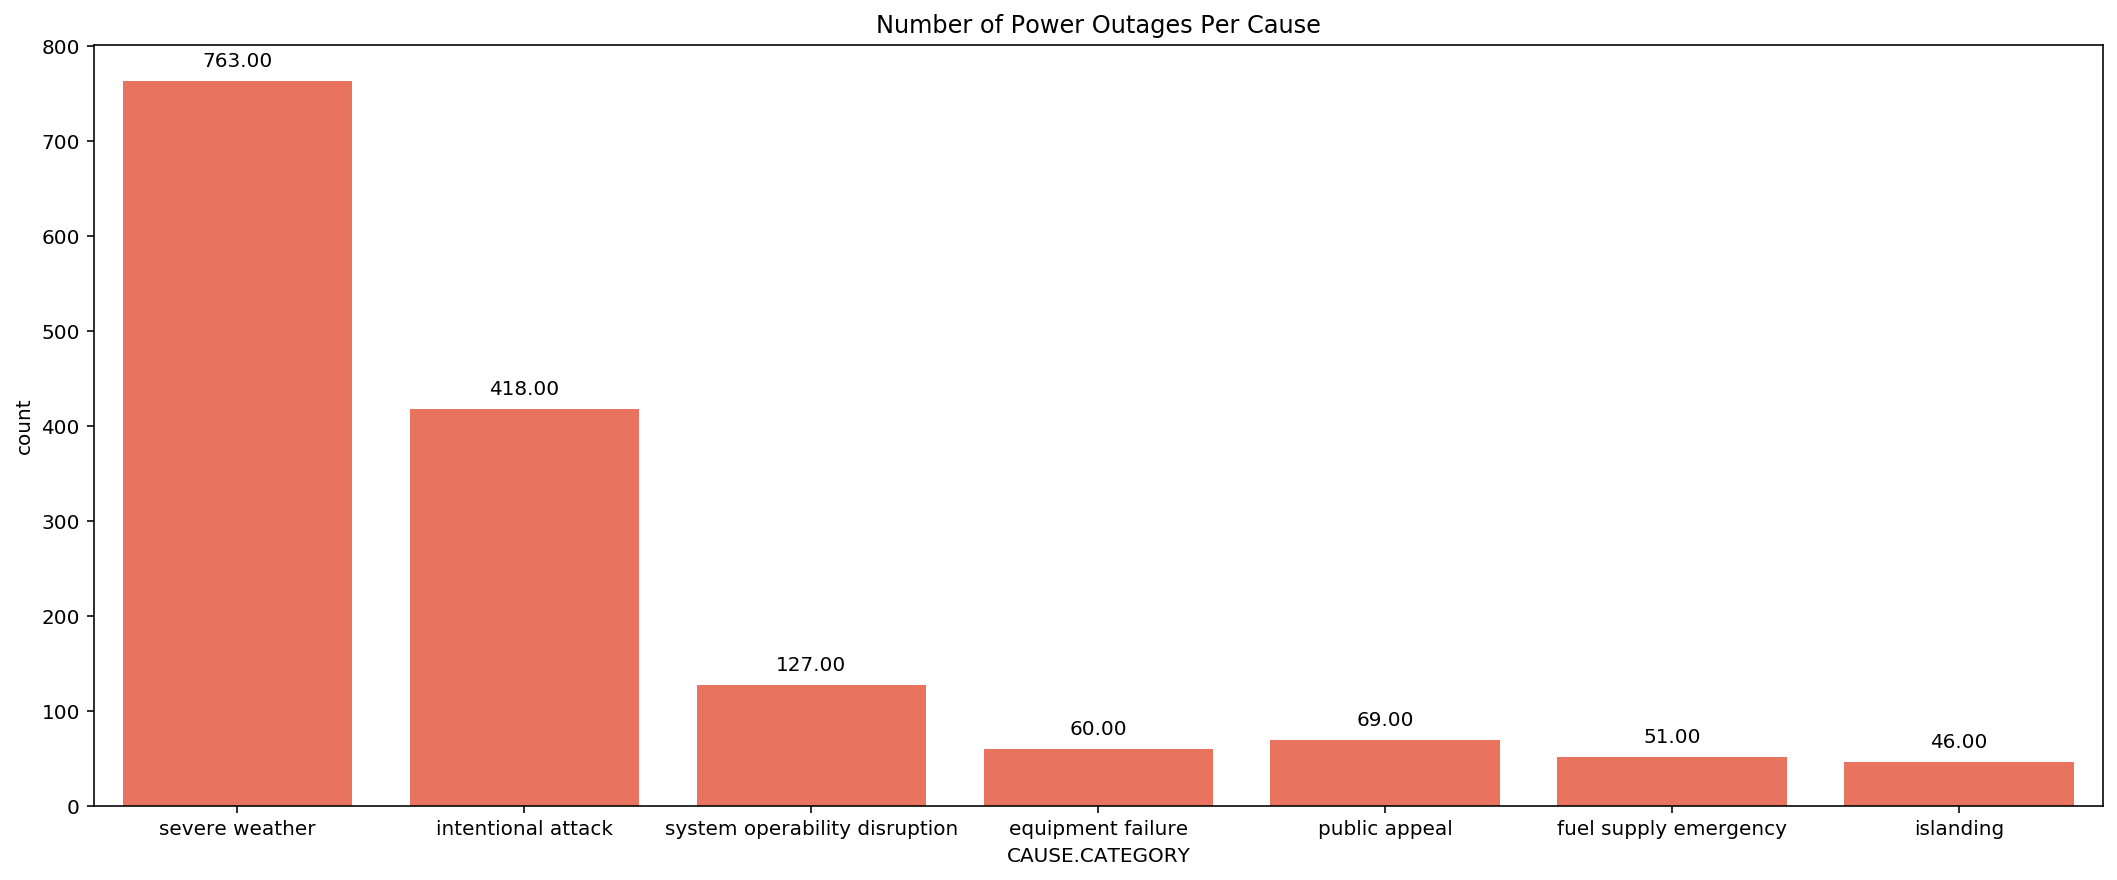

In [39]:
plt.figure(figsize=(18,7))
cause_distribution = sns.countplot(x='CAUSE.CATEGORY',data=filtered_outages, color="tomato")
cause_distribution.set_title('Number of Power Outages Per Cause')
for p in cause_distribution.patches:
    cause_distribution.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                                p.get_height()), ha = 'center', va = 'center', 
                                xytext = (0, 10), textcoords = 'offset points')

As you can see above, most power outages were caused by severe weather in the dataset

Plot 2: Outage Distribution Over Postal Codes

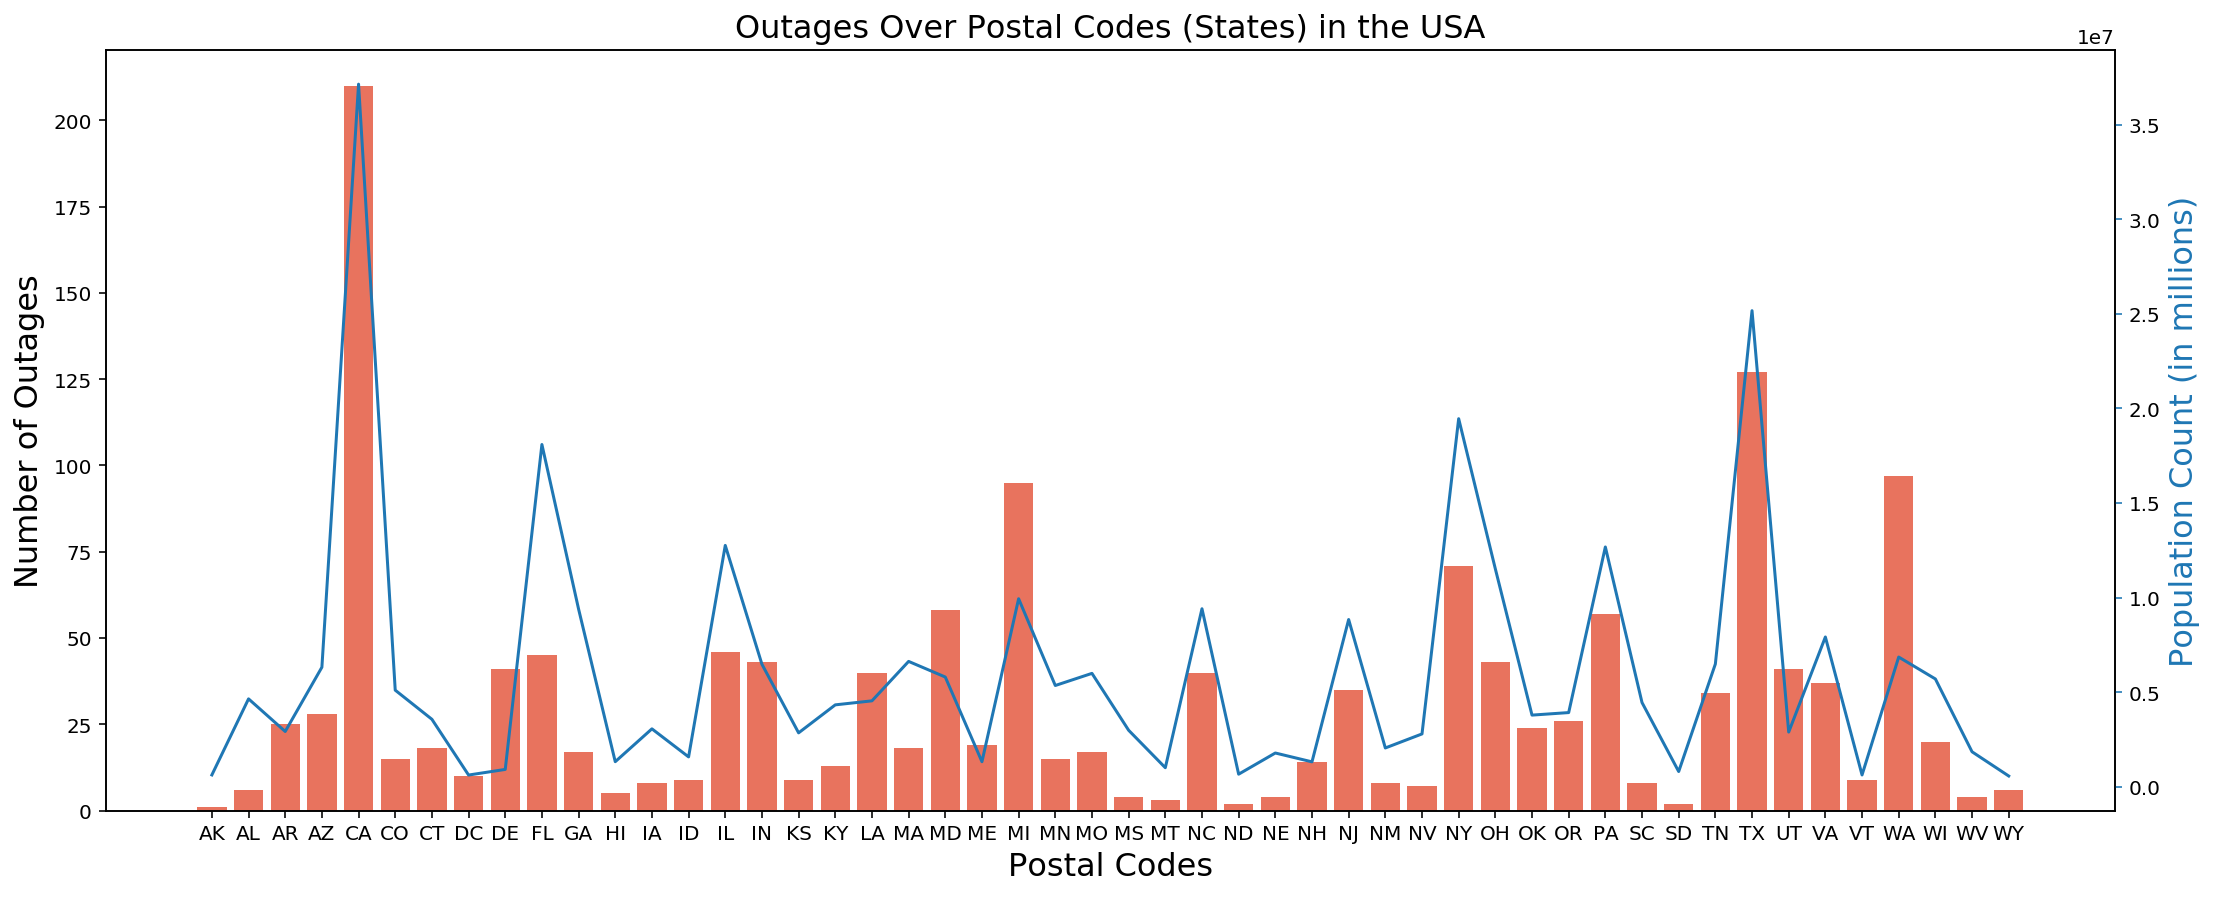

In [11]:
sorted_table = filtered_outages.sort_values('POSTAL.CODE') #sort postal code so graph is easier to read
sorted_table.head()

pop = list(sorted_table[['POSTAL.CODE','POPULATION']].groupby('POSTAL.CODE').mean()['POPULATION'])
pc = list(sorted_table[['POSTAL.CODE','POPULATION']].groupby('POSTAL.CODE').mean().index)

#Create combo chart
fig, ax1 = plt.subplots(figsize=(18,7))
color = 'tab:tomato'
#count plot creation
ax1.set_title('Outages Over Postal Codes (States) in the USA', fontsize=16)
ax1 = sns.countplot(x = 'POSTAL.CODE',data = sorted_table, color = "tomato") #used to be a bar plot
ax1.set_xlabel('Postal Codes', fontsize=16)
ax1.set_ylabel('Number of Outages', fontsize=16)
ax1.tick_params(axis = 'y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
#line plot creation
ax2.set_ylabel('Population Count (in millions)', fontsize = 16, color = color)
ax2 = sns.lineplot(x = pc, y = pop, color = color)
ax2.tick_params(axis = 'y', color = color)
#show plot
plt.show()

#source: https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

In order to better get an idea of how the number of outages fluctuate in each state, we overlayed the average population of the states between 2000-2016. Although there are definitely some outliers, we noticed that states with a higher population tend to have a higher number of outages. 

Plot 3: Choropleth / Heat Map

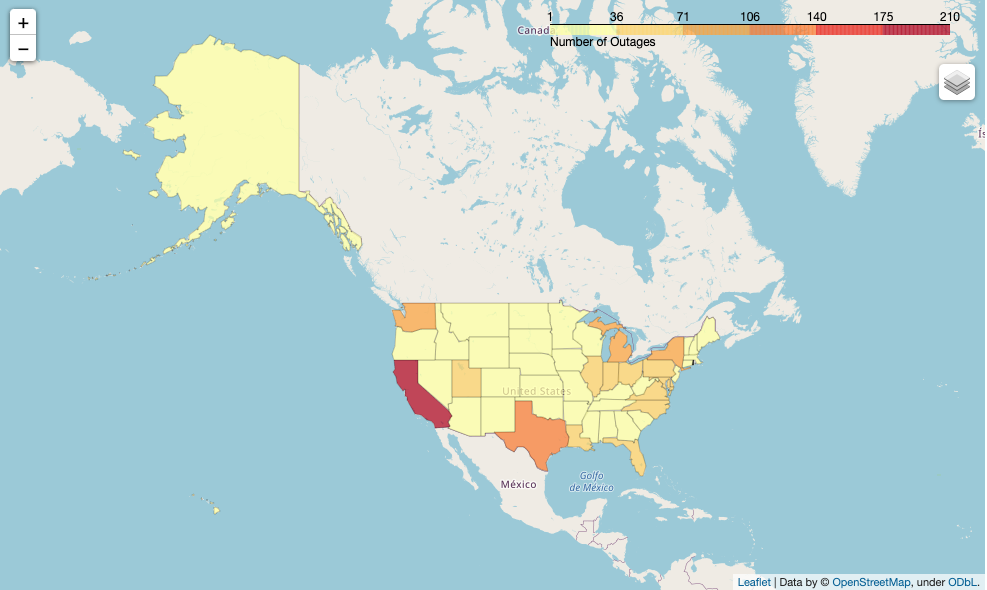

In [19]:
counts = sorted_table.groupby('POSTAL.CODE', as_index=False).count() #counts of how many times each state has had an outage

state_geo = os.path.join('data', 'us-states.json')
 
# initialize the map:
m = folium.Map(location=[50, -107],tiles="OpenStreetMap", zoom_start=3)
 
# add the color:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=counts,
 columns=['POSTAL.CODE', 'YEAR'],
 key_on='feature.id',
 fill_color='YlOrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name = 'Number of Outages'
)

folium.LayerControl().add_to(m)

m

#Folium map for a better geographic view of which states have the most power outages
#reference link: https://github.com/python-visualization/folium/tree/master/examples/data

#Comment out this portion if you're running on Jupyter Notebook
from IPython.display import Image
image = os.path.join('data', 'choroplethmap.png')
Image(filename= image)

This map was created in order to better visualize the bar graph above in terms of which states had a higher number of outages. 

Plot 4: Pie Chart on the Distribution of Climate Regions

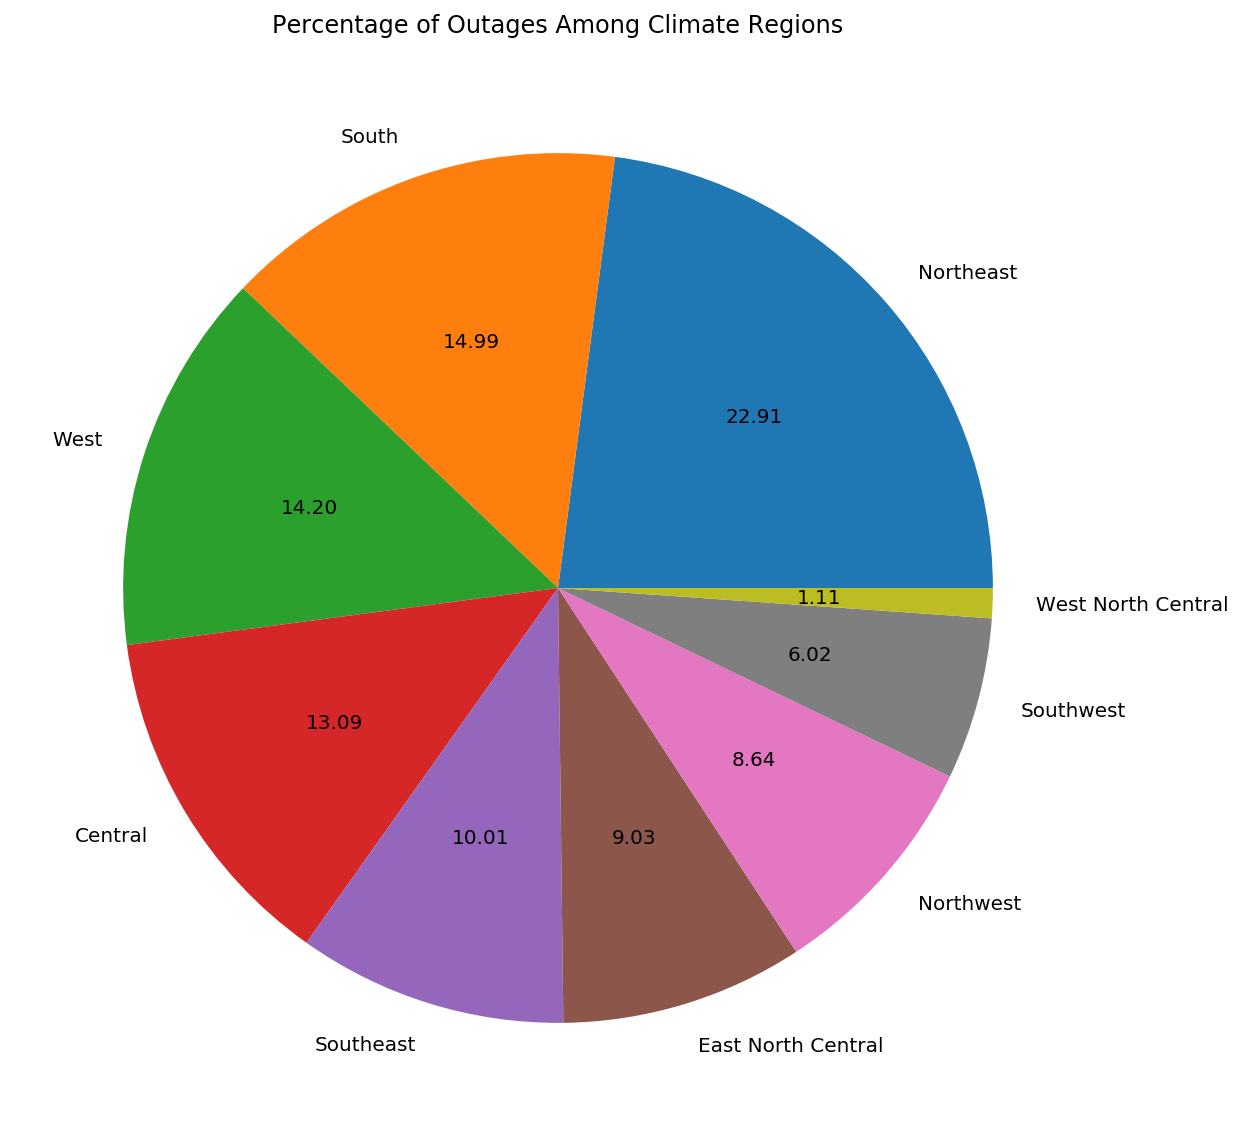

In [35]:
climate_regions_grouped = filtered_outages.groupby('CLIMATE.REGION').count()
climate_regions_grouped = climate_regions_grouped.sort_values('YEAR', ascending=False)

#plot climate regions
sizes = list(climate_regions_grouped['YEAR'])
labels = list(climate_regions_grouped.index)

plt.figure(figsize=(10,10))
plt.pie(sizes, labels = labels, autopct = "%.2f")
plt.title('Percentage of Outages Among Climate Regions')
plt.show()

#reference link: https://towardsdatascience.com/data-science-with-python-intro-to-data-visualization-and-matplotlib-5f799b7c6d82

When generalizing the areas we found most outages occur in the northeast.

_Bivariate Analysis_

Plot 1: Line Graph for Causes Over Time

Text(0.5, 1.0, 'Causes Over Time')

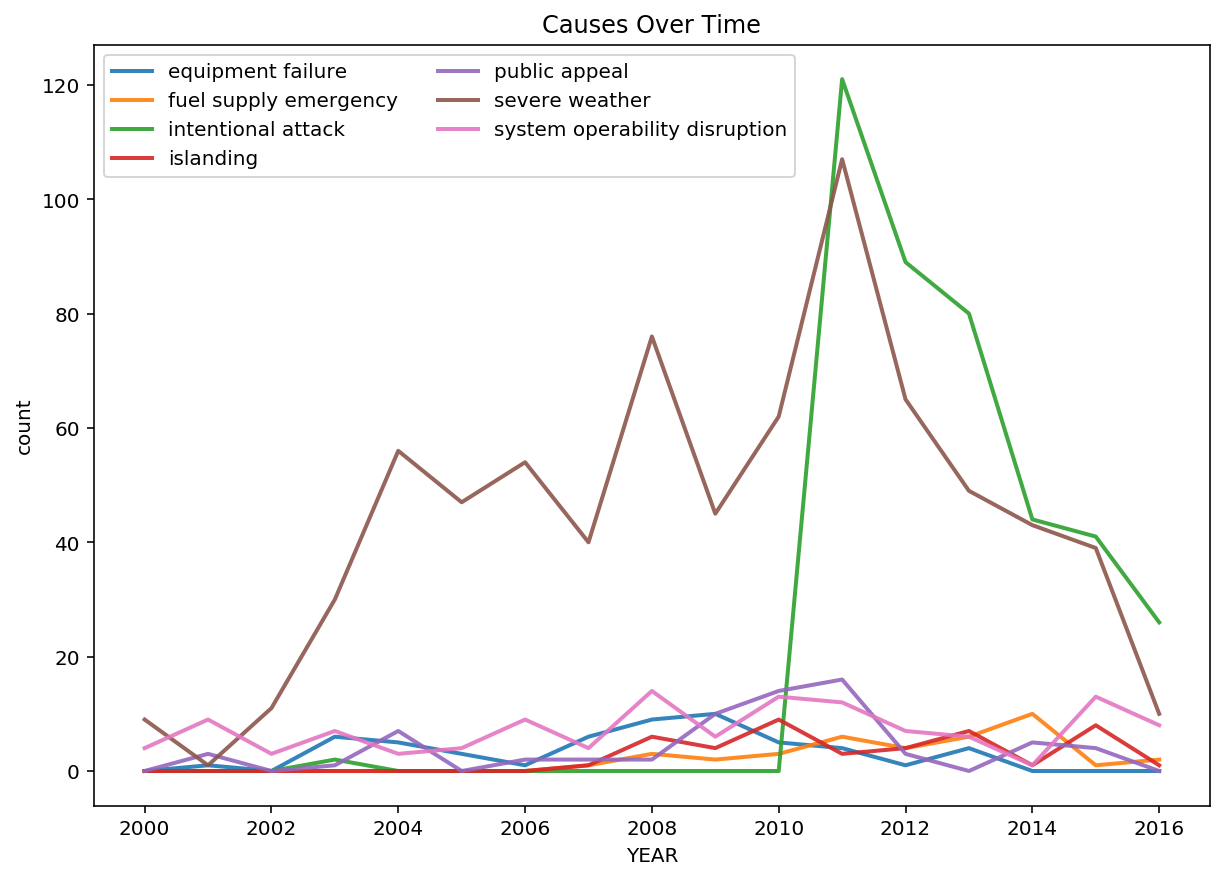

In [36]:
# Change of Causes over time
causes_dis_time = filtered_outages.pivot_table(index = 'YEAR', columns = 'CAUSE.CATEGORY', values = 'OUTAGE.DURATION', aggfunc = 'count', fill_value = 0)
causes_dis_time['YEAR'] = causes_dis_time.index

plt.figure(figsize=(10,7))
for column in causes_dis_time.columns[:-1]:
    plt.plot(causes_dis_time['YEAR'], causes_dis_time[column], marker='', linewidth=2, alpha=0.9, label=column)

plt.legend(loc = 2, ncol = 2) #add a legend for the lines
plt.xlabel('YEAR')
plt.ylabel('count')
plt.title('Causes Over Time')

Instead of focusing on overall outage causes, we wanted to see how they changed throughout the years. As year goes on, we see a large spike in intentional attacks in 2011. For more information, look at out Summary of Findings! In order to further investigate whether these causes affected different places, we checked to see whether or urban or rural places were affected more by each attack. 

Plot 2: Distribution of Power Outages Over Time

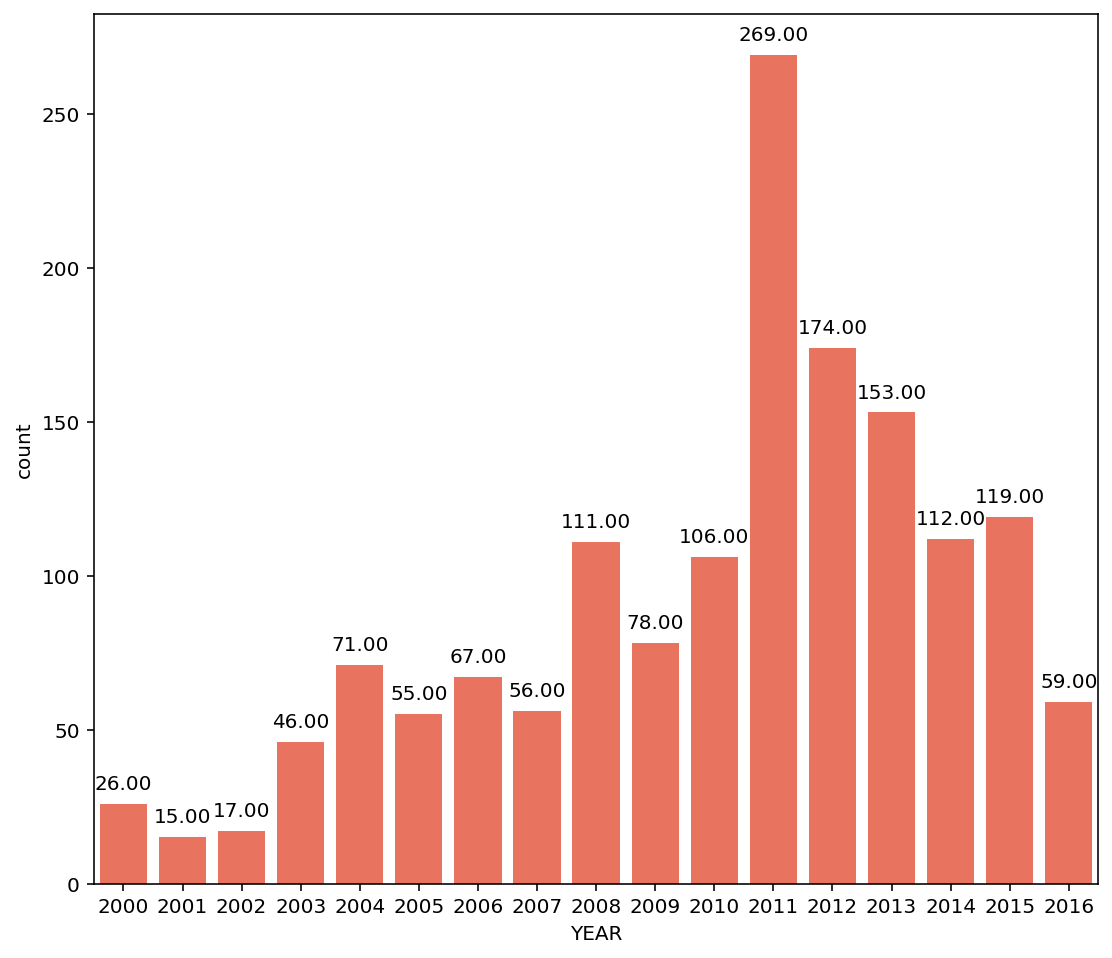

In [37]:
plt.figure(figsize=(9,8)) #make the size bigger so that x-axis is readable
years = sns.countplot(x='YEAR', data=filtered_outages, color="tomato") #set color to tomato so that they don't have a weird palette
for p in years.patches:
    years.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    
# Findings from plot: more power outages happen in recent years
# What happened in 2011 that caused so many power outtages?
# link: https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots

This is a visualization for what year major power outages occur. This is a univariate analysis to go more in depth about the spaghetti plot above. This bar plot also reflects the spike in 2011.

In [40]:
#all of the intentional attacks in 2011 were due to vandalism 

intentional_attacks = filtered_outages[filtered_outages['CAUSE.CATEGORY'] == 'intentional attack']
intentional_attacks[intentional_attacks['YEAR'] == 2011]['CAUSE.CATEGORY.DETAIL'].unique()

array(['vandalism'], dtype=object)

Plot 3: Distribution of Causes in Rural and Urbal Areas
- First Box Plot: Causes in Rural Areas
- Second Box Plot: Causes in Urban Areas

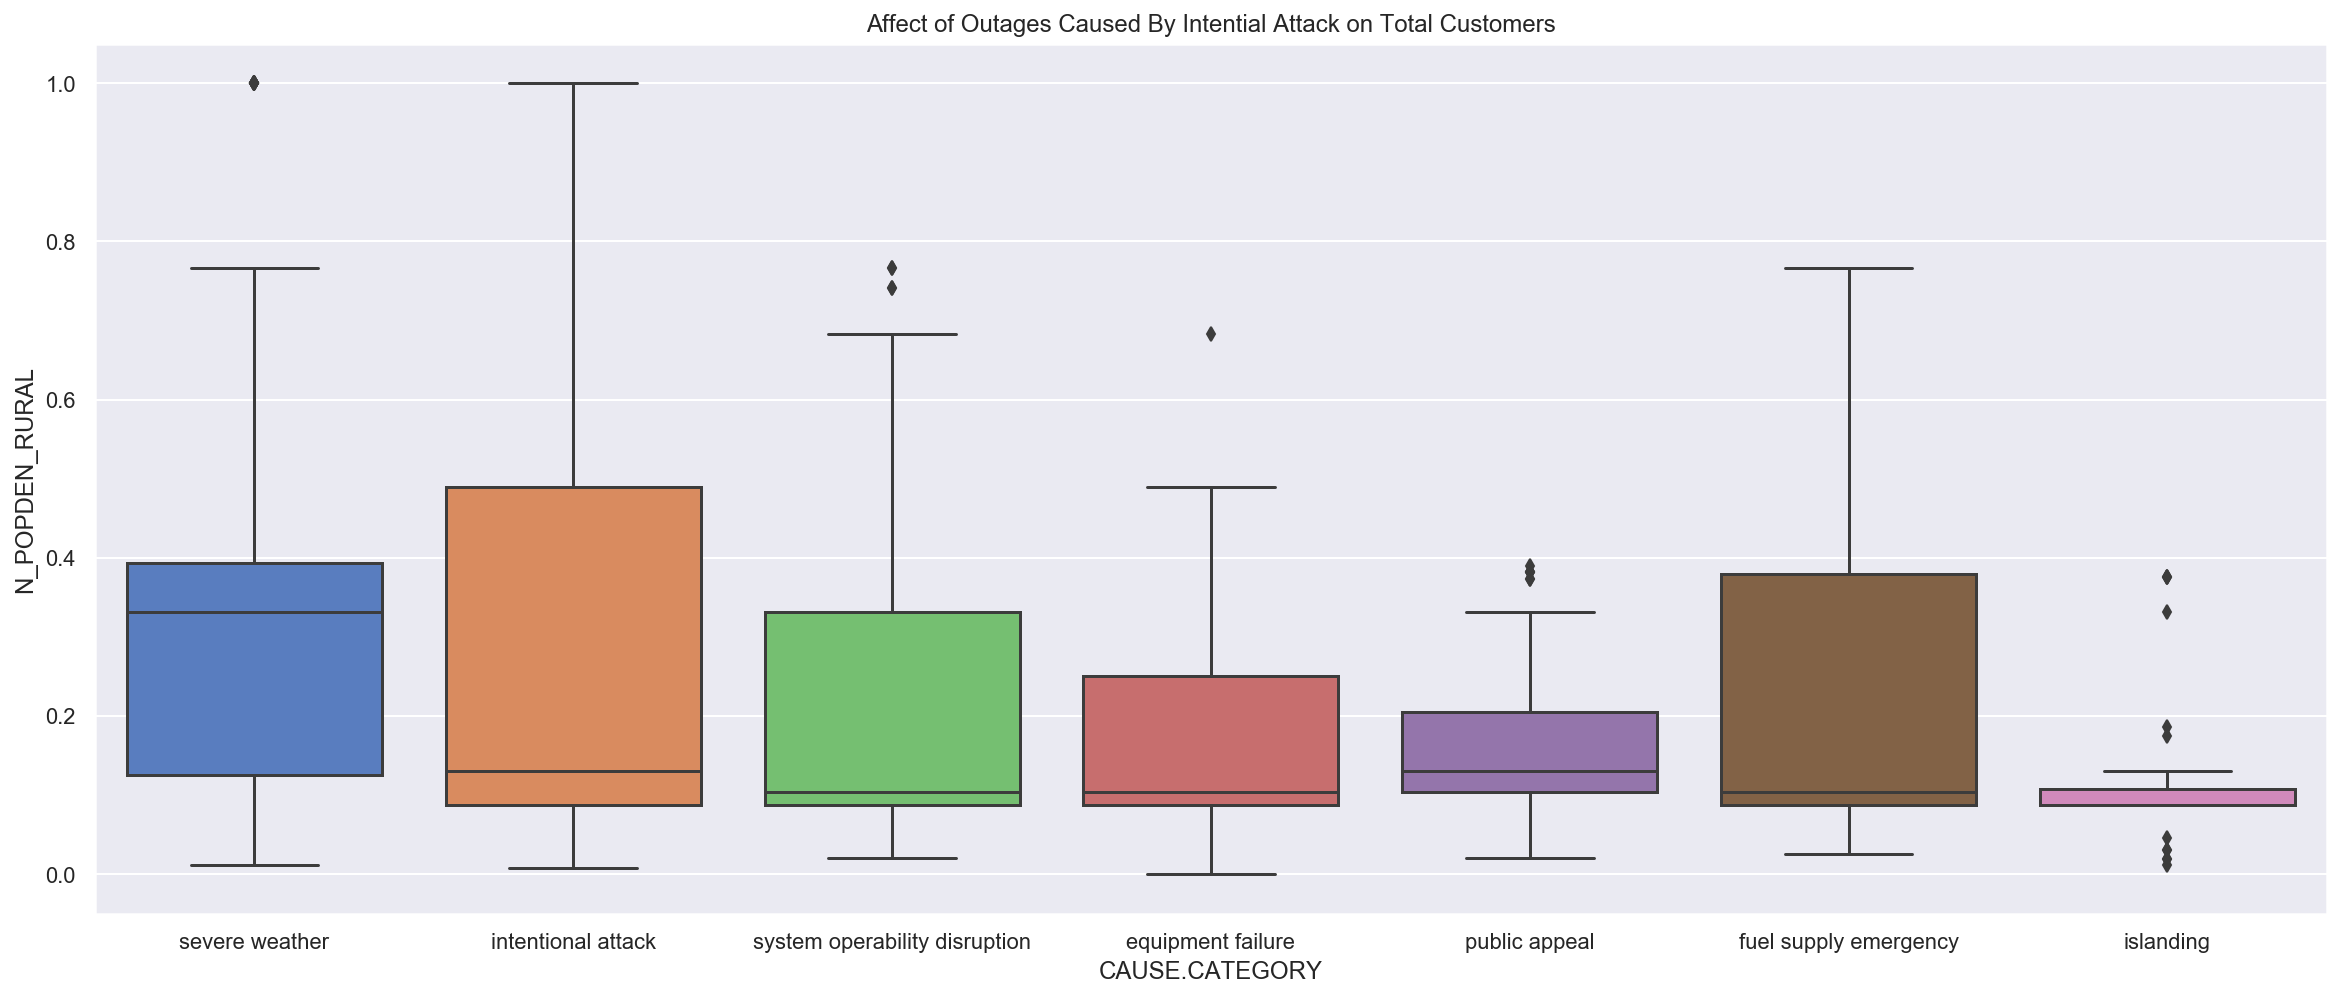

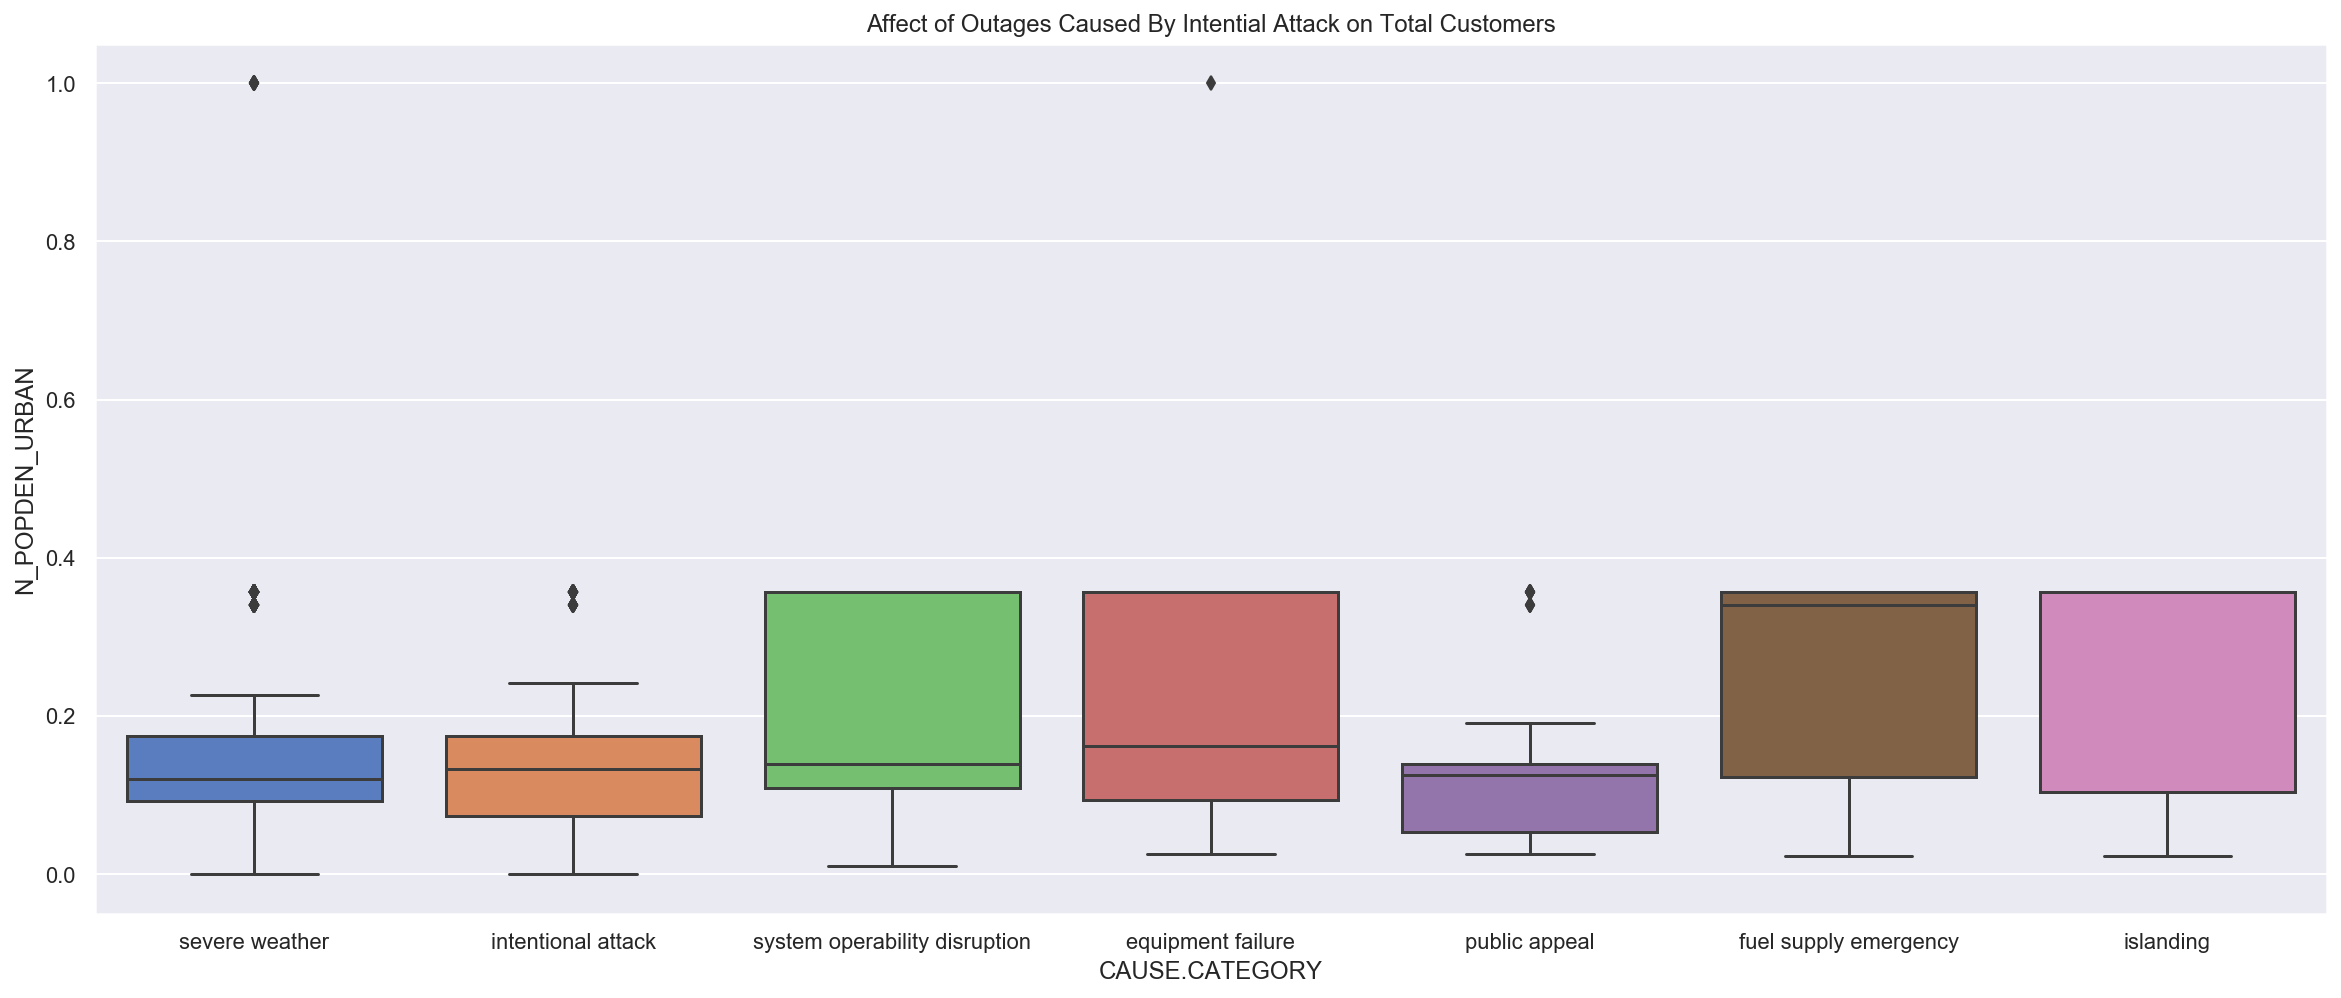

In [42]:
#normalize the urban and rural population densities in order to properly compare the two values
normalized = filtered_outages.copy()
normalized['N_POPDEN_URBAN'] = (filtered_outages['POPDEN_URBAN']-min(filtered_outages['POPDEN_URBAN']))/(max(filtered_outages['POPDEN_URBAN']) - min(filtered_outages['POPDEN_URBAN']))
normalized['N_POPDEN_RURAL'] = (filtered_outages['POPDEN_RURAL']-min(filtered_outages['POPDEN_RURAL']))/(max(filtered_outages['POPDEN_RURAL']) - min(filtered_outages['POPDEN_RURAL']))

#  Causes in Rural Areas

plt.figure(figsize=(20,8))
intentional_affect = sns.boxplot(data=normalized, x='CAUSE.CATEGORY', y='N_POPDEN_RURAL', palette=sns.color_palette("muted"))
intentional_affect.set_title('Affect of Outages Caused By Intential Attack on Total Customers')
sns.set(font_scale=1)
plt.show()

# intentional attack effect
# distribution of each type of intentional attack depending on the state's population density of urban areas
# graph results: suspicious activity seems to be the domainant intentional cause in places with higher urban population density

# Causes in urban areas 

plt.figure(figsize=(20,8))
intentional_affect = sns.boxplot(data=normalized, x='CAUSE.CATEGORY', y='N_POPDEN_URBAN', palette=sns.color_palette("muted"))
intentional_affect.set_title('Affect of Outages Caused By Intential Attack on Total Customers')
sns.set(font_scale=1)
plt.show()

_Aggregations_

Plot 1: Distribution of Number of Customers Affected by Specific Cause Category Detail 

Text(0.5, 0, 'Customers Affected Total')

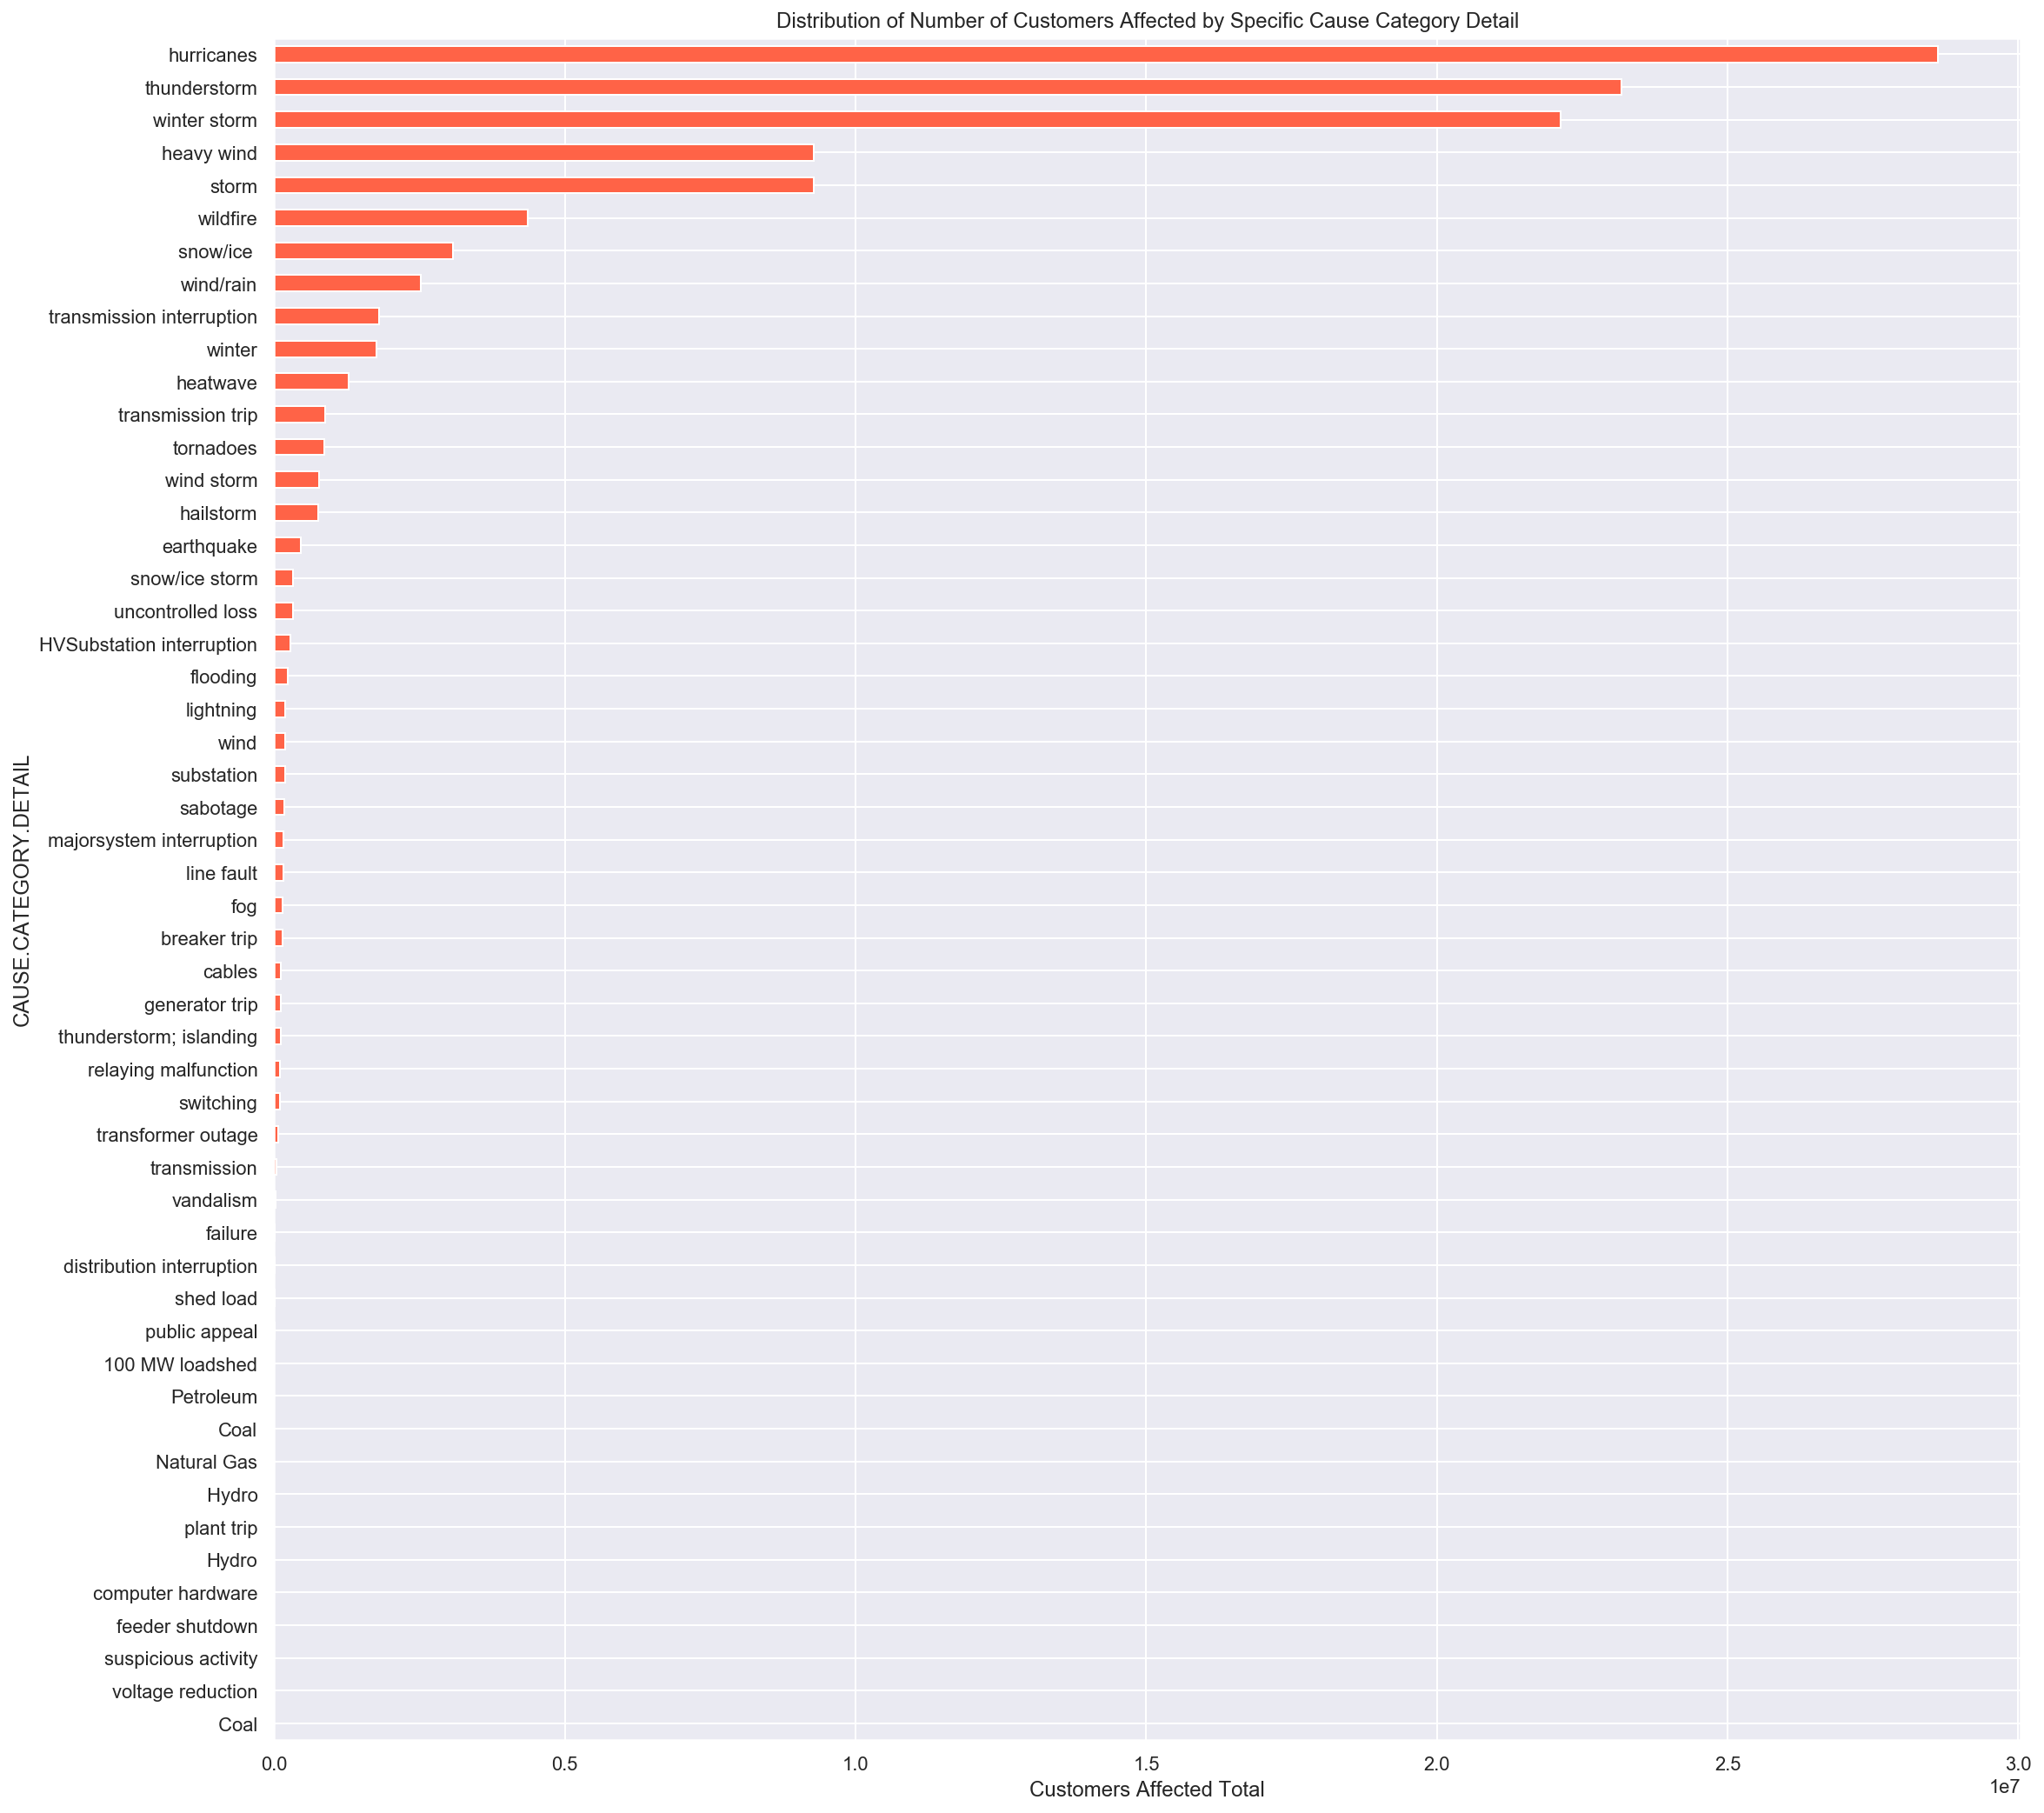

In [43]:
customers = filtered_outages.groupby('CAUSE.CATEGORY.DETAIL').sum()[['CUSTOMERS.AFFECTED']]
plt.figure(figsize=(18,18))
customers.sort_values('CUSTOMERS.AFFECTED')['CUSTOMERS.AFFECTED'].plot(kind = 'barh', color="tomato")
plt.title('Distribution of Number of Customers Affected by Specific Cause Category Detail')
plt.xlabel('Customers Affected Total')

_Other fun visualizations that don't relate to the hypothesis testing:_

Plot 1: Scatter Plot of the Counts of Start Times of an Outage

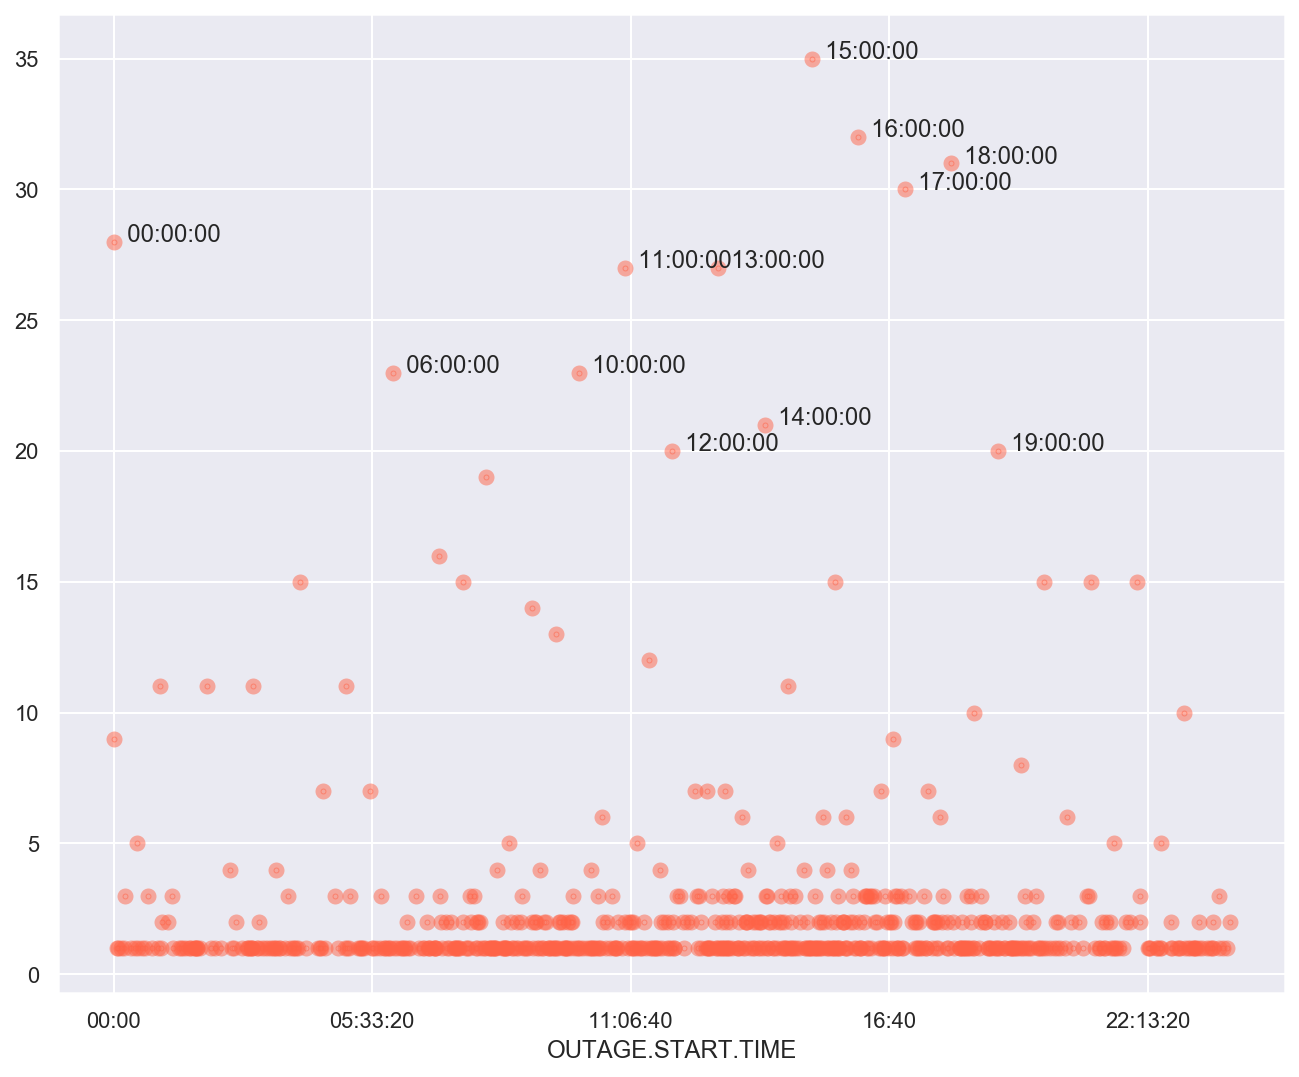

In [44]:
start_time_index = filtered_outages.groupby('OUTAGE.START.TIME').count() #get the counts of times that outages started

#get the points we want to annotate
annotations = start_time_index[start_time_index['YEAR'] > 19]

y = list(annotations['YEAR'])
z = list(annotations.index)

axes = start_time_index['YEAR'].plot(marker='.', markeredgewidth = 5, alpha=0.5, linestyle='None', figsize=(11, 9), color='tomato')

for i, txt in enumerate(z):
    axes.annotate('  ' + str(txt), (z[i], y[i]))
    
#link: https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
#the most outages occur at an even hour (users might put even times as estimates)

Plot 2: Interactive map that shows how the amount of outages changed throughout the years 

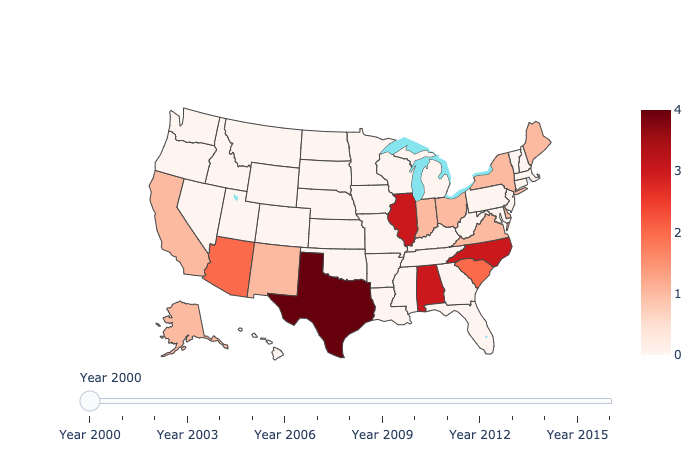

In [47]:
where_when = filtered_outages.pivot_table(index = 'POSTAL.CODE', columns = 'YEAR', values = 'U.S._STATE', aggfunc = 'count', fill_value = 0)   
where_when = where_when.reset_index()
where_when.columns.name = None

#for the interactive slider map
import plotly
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#with the year and slider
data_slider = []

#### Populate the data object
for year in where_when.columns[1:]:

    # Select the year (and remove DC for now)
    df_sected_crime = where_when[['POSTAL.CODE', year]]

    ### create the dictionary with the data for the current year
    data_one_year = dict(
                        type='choropleth',
                        locations = df_sected_crime['POSTAL.CODE'],
                        z=df_sected_crime[year].astype(float),
                        locationmode='USA-states',
                        colorscale = 'reds',
                        )

    data_slider.append(data_one_year)  # Add the dictionary to the list of dictionaries for the slider
    
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2000)) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)

## Create the 'sliders' object from the 'steps' 
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

# I set up the layout (including slider option)
layout = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'},
                      showlakes = True,  # if you want to give color to the lakes
                       lakecolor = 'rgb(133, 228, 237)'),
              sliders=sliders)


# I create the figure object:
fig = dict(data=data_slider, layout=layout) 

# to plot in the notebook
#Uncomment this portion if you're running on a Jupyter Notebook
#plotly.offline.iplot(fig)

#Comment out this portion if you're running on Jupyter Notebook
from IPython.display import Image
image = os.path.join('data', 'newplot.png')
Image(filename= image)

Plot 3: Correlation Matrix 
- You can see many interesting correlations with this correlation matrix for future analysis

Text(156.5, 0.5, 'column names')

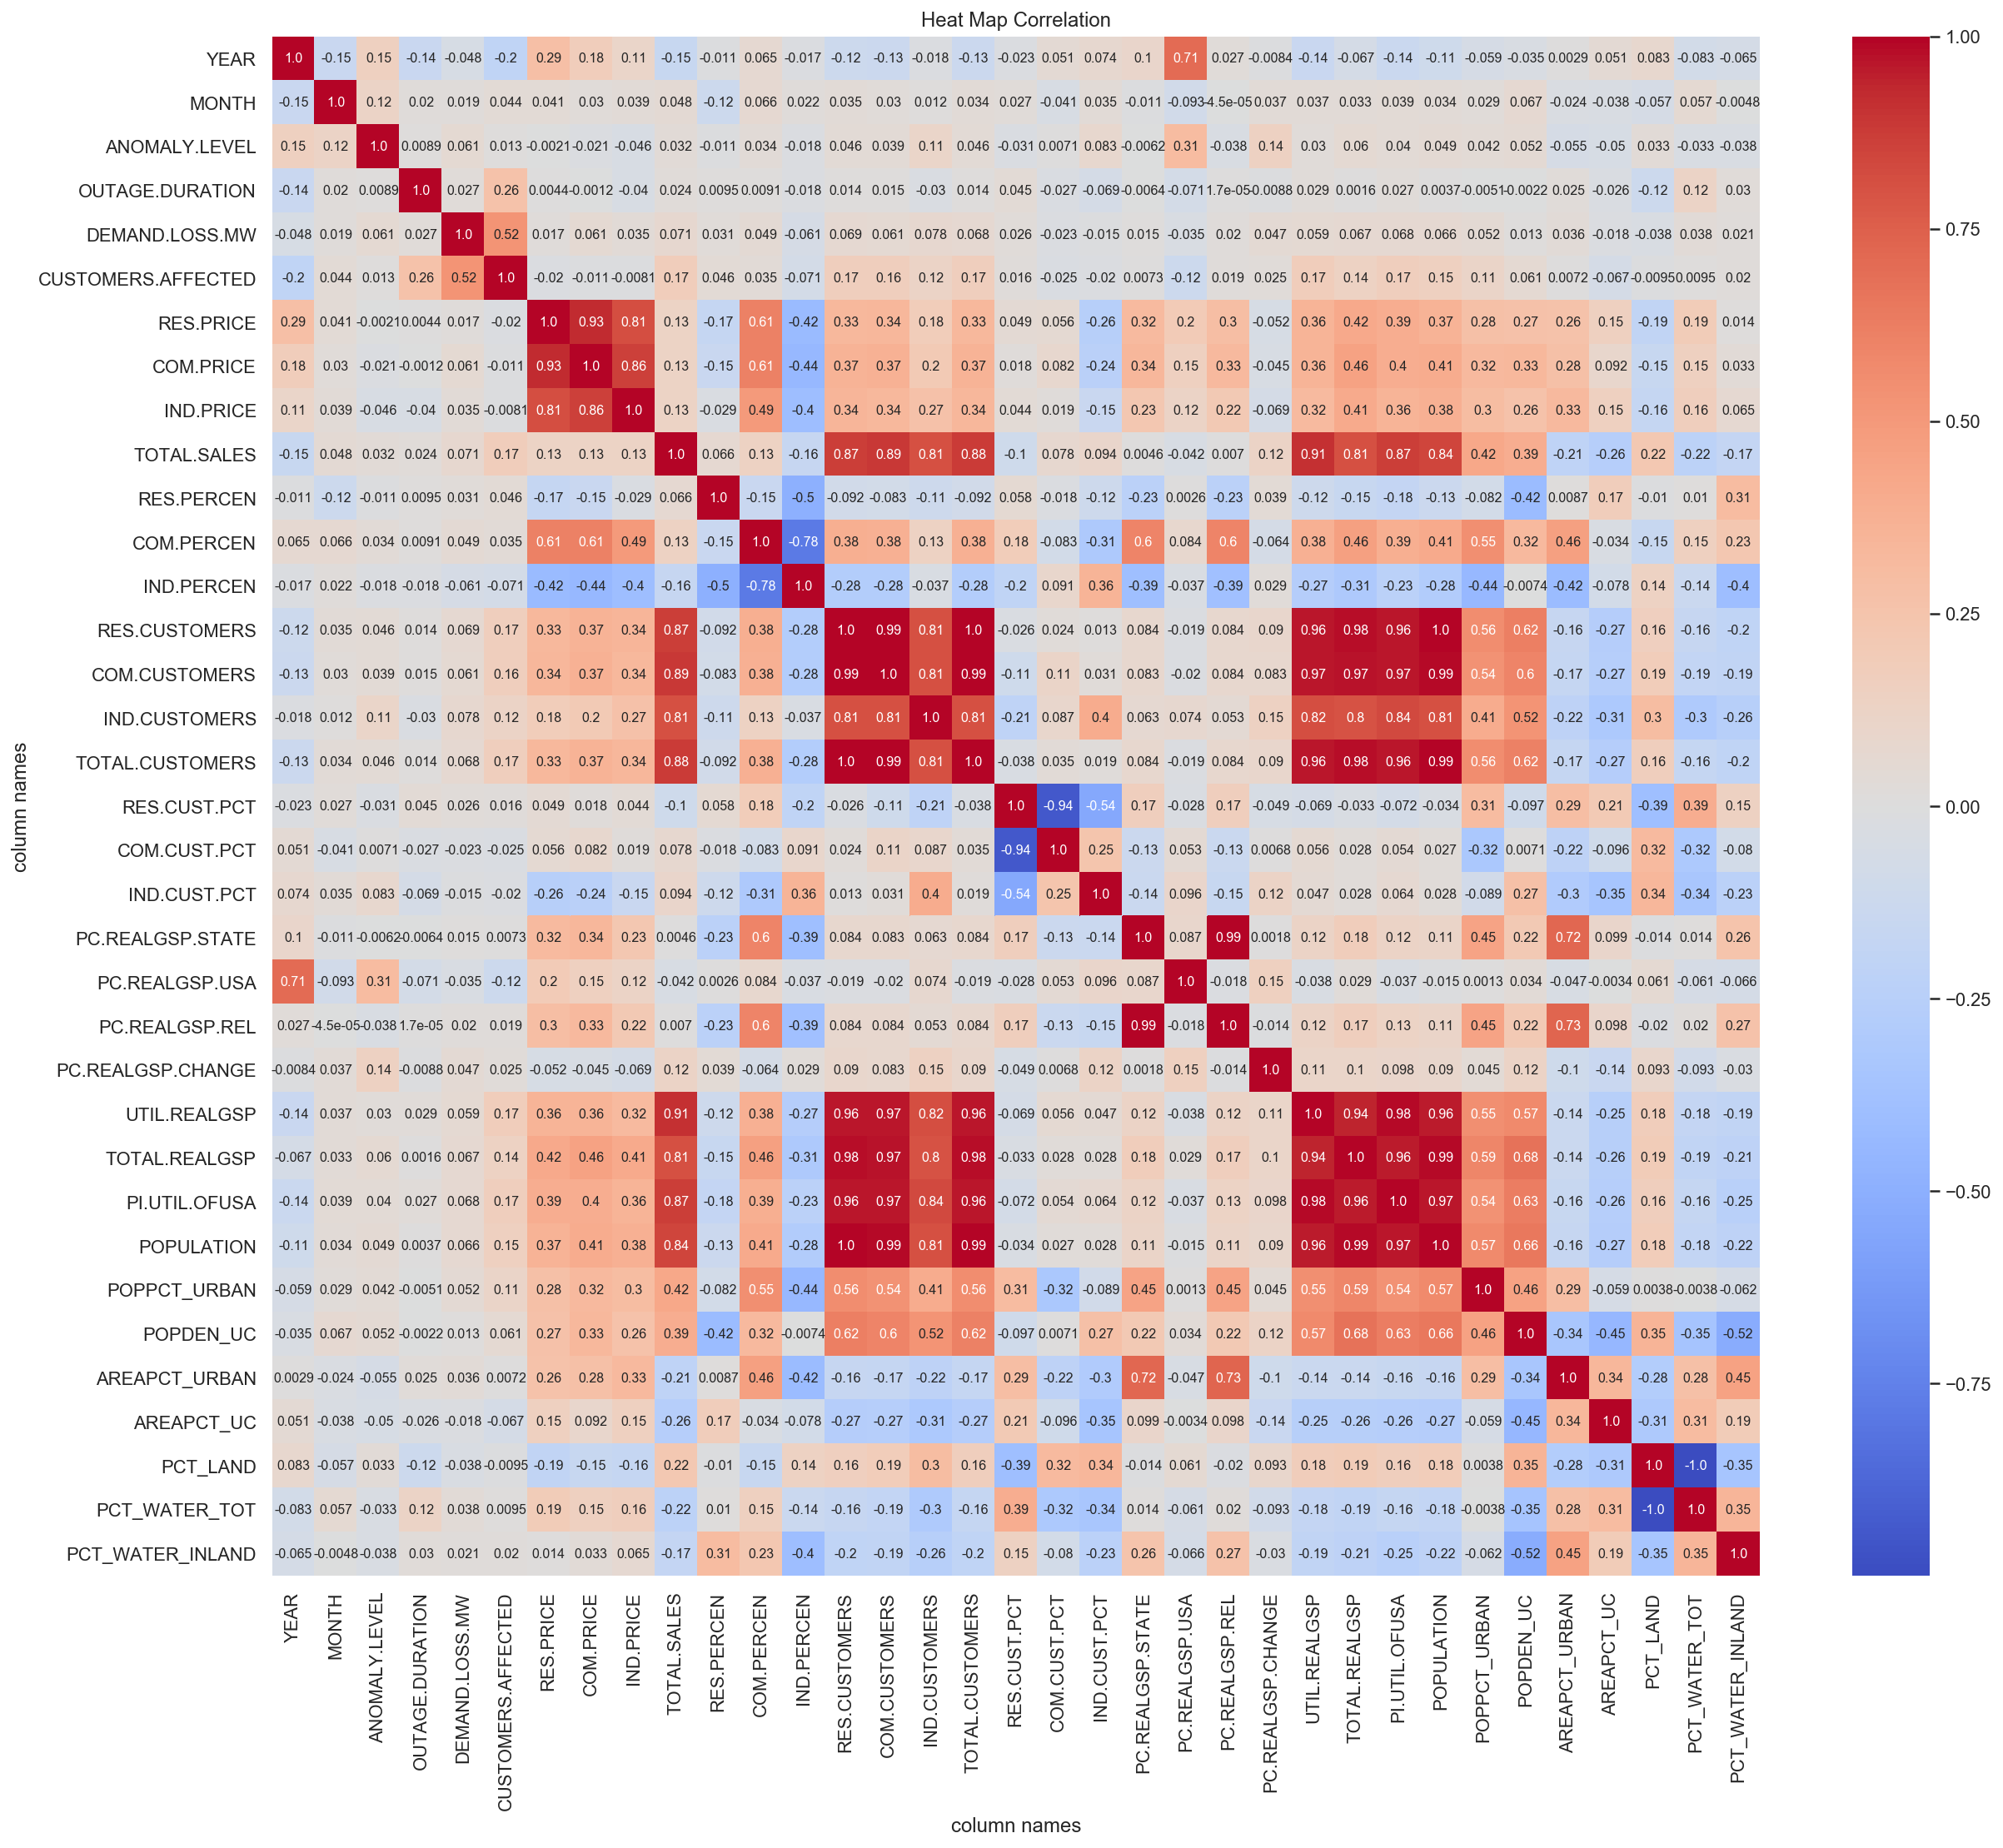

In [48]:
plt.subplots(figsize=(20,17))
sns.heatmap(filtered_outages.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 8}, fmt=".2")

plt.title('Heat Map Correlation')
plt.xlabel('column names')
plt.ylabel('column names')

#this plot changes on jupyter notebook, might look weird on pdf
#can adjust scale on jupyter notebook not on pdf
#Reference link: https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu

Plot 4:

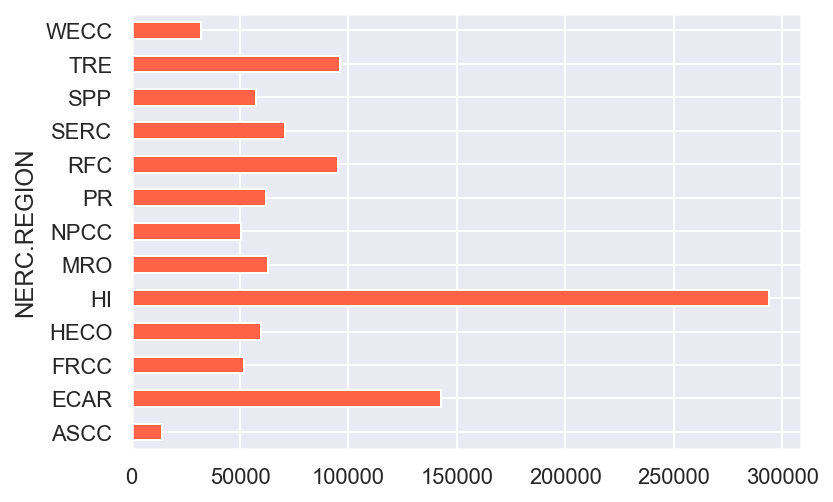

In [49]:
#used median to account for any outliers 
filtered_outages.groupby('NERC.REGION').median()['CUSTOMERS.AFFECTED'].drop('FRCC, SERC').plot(kind = 'barh', color="tomato")

### Assessment of Missingness

Imports to run KS test:

In [50]:
from scipy.stats import ks_2samp

Permutations Test for KS statistics

In [51]:
def perm4missing(filtered_outages, col):
    filtered = filtered_outages.assign(_null=filtered_outages['OUTAGE.DURATION'].isnull())
    no_null = filtered.loc[filtered['_null'] == False , col]
    is_null = filtered.loc[filtered['_null'] == True, col]
    obs = ks_2samp(no_null, is_null).statistic
    n_repetitions = 500

    ks_list = []
    for _ in range(n_repetitions):
    
        # shuffle the gender column
        shuffled_col = (filtered[col].sample(replace=False, frac=1).reset_index(drop=True))
    
        # put them in a table
        shuffled = (filtered.assign(**{'Shuffled': shuffled_col,}))
    
        # compute the KS
        grps = shuffled.groupby('_null')['Shuffled']
        ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
    
        ks_list.append(ks)
    
    ks_list = np.array(ks_list)

    pval = np.count_nonzero(ks_list > obs)/len(ks_list)
    
    #VISUALIZATION
    pd.Series(ks_list).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)

    plt.scatter(obs, 0, color='red', s=40);
    
    return pval
